In [ ]:
# Uncomment to Install #
#!pip install pandas
#!pip install sklearn

Epoch 1/70
Epoch 2/70
Epoch 3/70
Epoch 4/70
Epoch 5/70
Epoch 6/70
Epoch 7/70
Epoch 8/70
Epoch 9/70
Epoch 10/70
Epoch 11/70
Epoch 12/70
Epoch 13/70
Epoch 14/70
Epoch 15/70
Epoch 16/70
Epoch 17/70
Epoch 18/70
Epoch 19/70
Epoch 20/70
Epoch 21/70
Epoch 22/70
Epoch 23/70
Epoch 24/70
Epoch 25/70
Epoch 26/70
Epoch 27/70
Epoch 28/70
Epoch 29/70
Epoch 30/70
Epoch 31/70
Epoch 32/70
Epoch 33/70
Epoch 34/70
Epoch 35/70
Epoch 36/70
Epoch 37/70
Epoch 38/70
Epoch 39/70
Epoch 40/70
Epoch 41/70
Epoch 42/70
Epoch 43/70
Epoch 44/70
Epoch 45/70
Epoch 46/70
Epoch 47/70
Epoch 48/70
Epoch 49/70
Epoch 50/70
Epoch 51/70
Epoch 52/70
Epoch 53/70
Epoch 54/70
Epoch 55/70
Epoch 56/70
Epoch 57/70
Epoch 58/70
Epoch 59/70
Epoch 60/70
Epoch 61/70
Epoch 62/70
Epoch 63/70
Epoch 64/70
Epoch 65/70
Epoch 66/70
Epoch 67/70
Epoch 68/70
Epoch 69/70
Epoch 70/70
2/2 [==============================] - 0s 5ms/step


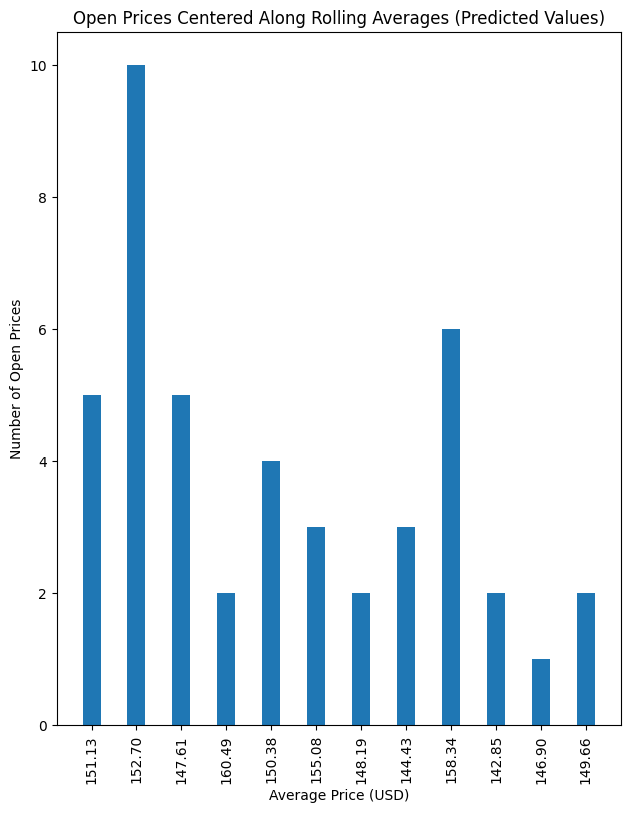

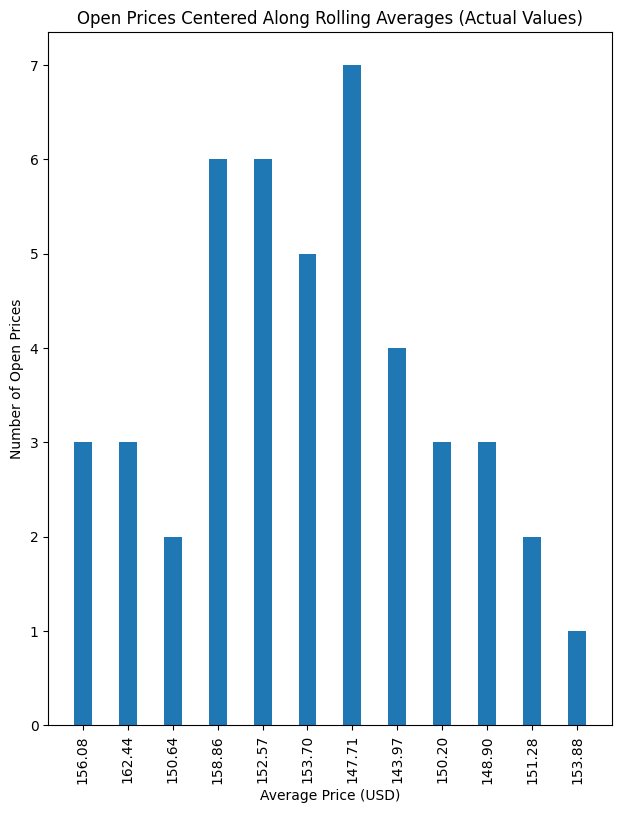

1/1 [==============================] - 0s 15ms/step


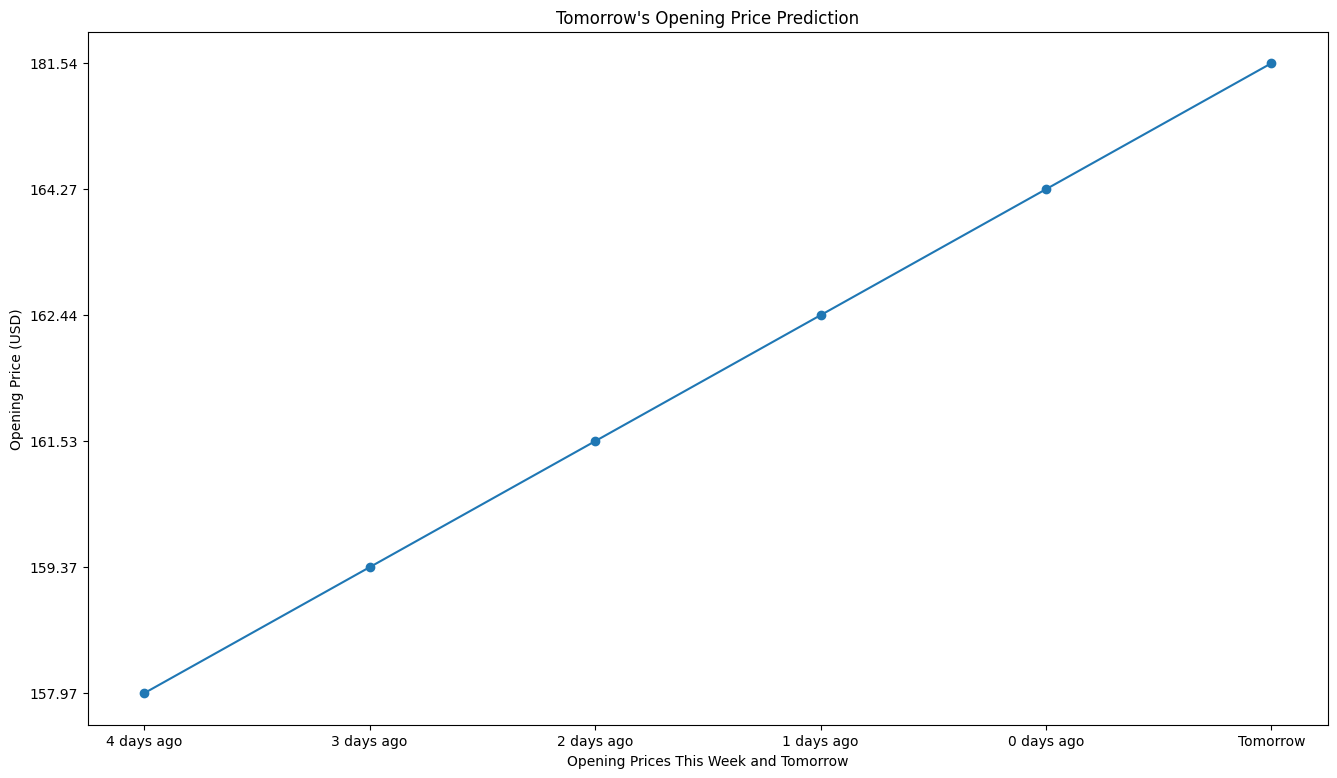

Accuracy of Train Data = 91.91%
RMSE of Train Data = 1.67
Accuracy of Test Data = 77.31%
RMSE of Test Data = 2.42

Tomorrow's Opening Price Prediction = $181.54
Size of Dataset = 251

Near $151.13 (predicted): 5 opening prices
Near $152.70 (predicted): 10 opening prices
Near $147.61 (predicted): 5 opening prices
Near $160.49 (predicted): 2 opening prices
Near $150.38 (predicted): 4 opening prices
Near $155.08 (predicted): 3 opening prices
Near $148.19 (predicted): 2 opening prices
Near $144.43 (predicted): 3 opening prices
Near $158.34 (predicted): 6 opening prices
Near $142.85 (predicted): 2 opening prices
Near $146.90 (predicted): 1 opening prices
Near $149.66 (predicted): 2 opening prices

Near $156.08 (actual): 3 opening prices
Near $162.44 (actual): 3 opening prices
Near $150.64 (actual): 2 opening prices
Near $158.86 (actual): 6 opening prices
Near $152.57 (actual): 6 opening prices
Near $153.70 (actual): 5 opening prices
Near $147.71 (actual): 7 opening prices
Near $143.97 (actu

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

class AppleStockPredictor:
  def __init__(self, data_file):
    # Dataset 
    self.data = pd.read_csv(data_file)
    self.sc = MinMaxScaler(feature_range=(0, 1))

    # Train and test
    self.X_train = None
    self.X_test = None
    self.y_train = None
    self.y_test = None

    # RNN object and predicted stock volumes
    self.rnn = None
    self.y_train_pred = None
    self.y_test_pred = None

    # Predicted and actual KNN values
    self.predicted_knn = None
    self.actual_knn = None

    # Accuracy and RMSE of train
    self.accuracy_train = None
    self.rmse_train = None

    # Accuracy and RMSE of test
    self.accuracy_test = None
    self.rmse_test = None

    # Tomorrow price and k for k means clustering
    self.k = 12
    self.tomorrow_prediction = None

    # RNN testing parameters
    self.units = 70
    self.activation_function = "tanh"
    self.dropout_parameter = 0.2
    self.dense_parameter = 1
    self.error_function = "mse"
    self.optimizer = "adam"
    self.epochs = 70
    self.batch_size = 40
    self.verbose = 4

  def preprocess_and_train(self):
    # Drop null values and redundant rows
    self.data = self.data.dropna()
    self.data = self.data.drop_duplicates()

    # Train and test data lengths
    train_length = round(len(self.data) *  0.8)
    test_length = len(self.data) - train_length

    # Train and test data
    train_data = self.data[:train_length].iloc[:, :2] 
    test_data = self.data[train_length:].iloc[:, :2]

    # Convert to datetime object
    train_data['Date'] = pd.to_datetime(train_data['Date'])
    test_data['Date'] = pd.to_datetime(test_data['Date'])

    # Train and test on open price
    train_data = train_data['Open'].values
    test_data = test_data['Open'].values

    # Reshape train data
    train_data = np.reshape(train_data, (-1, 1))
    train_data = self.sc.fit_transform(train_data)

    # Reshape test data
    test_data = np.reshape(test_data, (-1, 1))
    test_data = self.sc.fit_transform(test_data)

    # Empty training datasets
    self.X_train = []
    self.y_train = []
    
    # 5 stock market week days are in X train and next week day in y train
    for i in range(5, train_length):
      self.X_train.append(train_data[i-5:i, 0])
      self.y_train.append(train_data[i, 0])

    # Convert to array
    self.X_train = np.array(self.X_train)
    self.y_train = np.array(self.y_train)

    # Reshape train data
    self.X_train = np.reshape(self.X_train, (self.X_train.shape[0], self.X_train.shape[1], 1))
    self.y_train = np.reshape(self.y_train, (self.y_train.shape[0], 1))

    # Empty testing datasets
    self.X_test = []
    self.y_test = []

    # 5 stock market week days are in X test and next week day in y test
    for i in range(5, test_length):
      self.X_test.append(test_data[i-5:i, 0])
      self.y_test.append(test_data[i, 0])

    # Convert to array
    self.X_test = np.array(self.X_test)
    self.y_test = np.array(self.y_test)

    # Reshape train data
    self.X_test = np.reshape(self.X_test, (self.X_test.shape[0], self.X_test.shape[1], 1))
    self.y_test = np.reshape(self.y_test, (self.y_test.shape[0], 1))

  def fit_rnn(self): 
    # Initialize RNN
    self.rnn = Sequential()

    # Add hidden layer
    self.rnn.add(
        SimpleRNN(units=self.units, activation=self.activation_function, return_sequences=True, input_shape=(self.X_train.shape[1], 1))
        )
    self.rnn.add(Dropout(self.dropout_parameter))

    # Add hidden layer
    self.rnn.add(
        SimpleRNN(units=self.units)
        )
    self.rnn.add(Dropout(self.dropout_parameter))

    # Add output layer
    self.rnn.add(Dense(self.dense_parameter))

    # Compile and fit RNN
    self.rnn.compile(loss=self.error_function, optimizer=self.optimizer)
    self.rnn.fit(self.X_train, self.y_train, epochs=self.epochs, batch_size=self.batch_size, verbose=self.verbose)

    # Train the model and predict prices
    self.y_train_pred = self.rnn.predict(self.X_train)
    self.y_train_pred = self.sc.inverse_transform(self.y_train_pred)

    # Train the model and predict prices
    self.y_test_pred = self.rnn.predict(self.X_test)
    self.y_test_pred = self.sc.inverse_transform(self.y_test_pred)

    # Inverse transform y train and y test
    self.y_train = self.sc.inverse_transform(self.y_train)
    self.y_test = self.sc.inverse_transform(self.y_test)

    # Get KNN of predicted and actual values
    self.predicted_knn = self.knn_from_scratch(self.y_test_pred)
    self.actual_knn = self.knn_from_scratch(self.y_test)

    # First subplit
    plt.figure(figsize=(16, 9))
    plt.subplot(1, 2, 1)

    # Plot predicted KNN values
    plt.bar(self.predicted_knn[0], self.predicted_knn[1], width = 0.4)
    plt.xlabel("Average Price (USD)")
    plt.xticks(rotation = 90)
    plt.ylabel("Number of Open Prices")
    plt.title("Open Prices Centered Along Rolling Averages (Predicted Values)")

    # Second subplot
    plt.figure(figsize=(16, 9))
    plt.subplot(1, 2, 2)

    # Plot actual KNN values
    plt.bar(self.actual_knn[0], self.actual_knn[1], width = 0.4)
    plt.xlabel("Average Price (USD)")
    plt.xticks(rotation = 90)
    plt.ylabel("Number of Open Prices")
    plt.title("Open Prices Centered Along Rolling Averages (Actual Values)")
    plt.show()

  def make_k_empty_clusters(self, centroids):
    # Empty our clusters
    clusters = []

    # Make k empty clusters
    for i in range(0, len(centroids)):
      empty_list = []
      clusters.append(empty_list)

    return clusters

  def min_index(self, list):
    # Get min index of list
    min_ind = 0

    for i in range(0, len(list)):
      # Update min index
      if list[i] < list[min_ind]:
        min_ind = i

    return min_ind

  def equal_lists(self, list1, list2):
    # Check if lists are equal length
    if len(list1) == len(list2):
      # Iterate lists
      for i in range(0, len(list1)):
        # If one pair doesn't match, lists not equal
        if list1[i] != list2[i]:
          return False

      # Lists are same, return true
      return True

    # Else, return false
    else:
      return False

  def get_new_centroid_index(self, cluster):
    # Distances between every other point
    sums = []

    # Compare all points
    for point1 in cluster:
      # Distnace between every other point
      sum = 0

      for point2 in cluster:
        # Distance between every other point
        dist = (point1 - point2) * (point1 - point2)
        sum += dist

      # Add average sum
      average_sum = sum / len(cluster)
      sums.append(average_sum)

    # Get minimum index average distace
    min_index = self.min_index(sums)
    return min_index

  def knn_from_scratch(self, sample_data):
    # Sample data length
    num_tweets = len(sample_data)

    # Get centroid indices
    choices = np.random.choice(len(sample_data), self.k, replace=False)
    centroids = []

    # Add values at random indices
    for choice in choices:
      value = sample_data[choice]
      centroids.append(value)

    # Make k empty clusters
    clusters = self.make_k_empty_clusters(centroids)

    while True:
      # Iterate all Jaccard values
      for i in range(0, len(sample_data)):
        # Store distance from centroids
        dist_from_centroids = []

        # Get istance between point and centroid
        for j in range(0, len(centroids)):
          dist_from_centroid = (sample_data[i] - centroids[j]) * (sample_data[i] - centroids[j])
          dist_from_centroids.append(dist_from_centroid)

        # Get index of closest centroid, then put into respective cluster
        ind_closest = self.min_index(dist_from_centroids)
        clusters[ind_closest].append(sample_data[i])

      # Find new centroids
      new_centroids = []

      # Iterate each cluster
      for cluster in clusters:
        # Get index of lowest average Jaccard from every other tweet
        new_centroid_index = self.get_new_centroid_index(cluster)

        # Get centroid at that index, then append
        new_centroid = cluster[new_centroid_index]
        new_centroids.append(new_centroid)

      # If new centroids don't change, break
      if self.equal_lists(centroids, new_centroids) is True:
        break

      # Else, update centroids and empty clusters
      else:
        centroids = new_centroids
        clusters = self.make_k_empty_clusters(centroids)

    # Info about each cluster
    average_prices = []
    open_prices = []

    # Get centroid and number of open prices for each cluster
    for i in range(0, len(clusters)):
      average_prices.append("%.2f"%centroids[i][0])
      open_prices.append(len(clusters[i]))

    # Return info about each cluster
    return average_prices, open_prices

  def predict_tomorrow(self):
    # Get last 6 days to predict the next week's opening price
    last_week = self.data.iloc[-5:]['Open'].values

    # Convert to 2D then to 3D
    last_week_reshaped = self.sc.fit_transform(last_week.reshape(-1, 1))
    last_week_reshaped = np.reshape(last_week, (1, 5, 1))

    # Predict next day's opening price and convert back to reasonable numbers
    self.tomorrow_prediction = self.rnn.predict(last_week_reshaped)
    self.tomorrow_prediction = self.sc.inverse_transform(self.tomorrow_prediction)
    self.tomorrow_prediction = self.tomorrow_prediction[0][0]

    # Info of the last week
    last_week_labels = []
    last_week_prices = []

    # Get last week's information
    for i in range(0, len(last_week)):
      # Get label and price
      label = f"{len(last_week) - i - 1} days ago"
      price = float("%.2f"%last_week[i])

      # Append label and price
      last_week_labels.append(label)
      last_week_prices.append(price)

    # Add next day's label and price
    last_week_labels.append("Tomorrow")
    last_week_prices.append("%.2f"%self.tomorrow_prediction)

    # Plot the last week's open prices and tomorrow's as well
    plt.figure(figsize=(16, 9))
    plt.plot(last_week_labels, last_week_prices, marker='o')
    plt.xlabel("Opening Prices This Week and Tomorrow")
    plt.ylabel("Opening Price (USD)")
    plt.title("Tomorrow's Opening Price Prediction")
    plt.show()
  
  def evaluate_model_accuracy(self):
    # Accuracy metrics for train data
    self.accuracy_train = r2_score(self.y_train, self.y_train_pred) * 100
    self.rmse_train = mean_squared_error(self.y_train, self.y_train_pred)
    self.rmse_train = np.sqrt(self.rmse_train)

    # Accuracy metrics for test data
    self.accuracy_test = r2_score(self.y_test, self.y_test_pred) * 100
    self.rmse_test = mean_squared_error(self.y_test, self.y_test_pred)
    self.rmse_test = np.sqrt(self.rmse_test)

    # Print accuracy metrics
    print(f"Accuracy of Train Data = {self.accuracy_train:.2f}%")
    print(f"RMSE of Train Data = {self.rmse_train:.2f}")
    print(f"Accuracy of Test Data = {self.accuracy_test:.2f}%")
    print(f"RMSE of Test Data = {self.rmse_test:.2f}\n")

    # Print accuracy metrics
    print(f"Tomorrow's Opening Price Prediction = ${self.tomorrow_prediction:.2f}")
    print(f"Size of Dataset = {len(self.data)}\n")

    # Print predicted KNN results
    for i in range(0, self.k):
      # Print number of opening prices near centroid
      predicted_centroid = self.predicted_knn[0][i]
      pc_count = self.predicted_knn[1][i]
      print(f"Near ${predicted_centroid} (predicted): {pc_count} opening prices")

      # New line
      if i == self.k - 1:
        print()

    # Print predicted KNN results
    for i in range(0, self.k):
      # Print number of opening prices near centroid
      actual_centroid = self.actual_knn[0][i]
      ac_count = self.actual_knn[1][i]
      print(f"Near ${actual_centroid} (actual): {ac_count} opening prices")

      # New line
      if i == self.k - 1:
        print()

if __name__ == "__main__":
  # Link, sheet id, and export
  sheet_link = 'https://docs.google.com/spreadsheets/d/'
  sheet_id = '1sM3eVub66k-zlAmuIJf3o8YXUPwA4ktOeWJagfRmDWI'
  sheet_magic = '/export?format=csv'

  apple = AppleStockPredictor(f"{sheet_link}{sheet_id}{sheet_magic}")

  # Preprocess and train data
  apple.preprocess_and_train()
  apple.fit_rnn()
  apple.predict_tomorrow()
  apple.evaluate_model_accuracy()

https://www.kaggle.com/code/ozkanozturk/stock-price-prediction-by-simple-rnn-and-lstm